###### NAME : Joseph Mancillas
###### NET ID : j_m1083
###### SUBMISSION DATE : February 9th, 2020


### Instructions for submission

# HOW TO DO THE ASSIGNMENT?

```
>> You are given a view only link of this google colab files.
>> Open the link in your favorite browser.
>> Make sure you are logged in with your google account.
>> Now Go to File and 'save a copy on in Drive'
>> Open the saved copy from Drive and rename it by replacing your netid. 'CS4347-Assighnment1_netid.ipynb
>> Now start working on assignment
>> If you have any queries, visit TA's office hours
```

# HOW TO SUBMIT THE ASSIGNMENT?

```
>> Before you submit make sure everything is fine
>> If you try to edit your assignment after submission your assignment will be void
>> You can create multiple copies of your assignment if you will, but never edit the copy which you have submitted

**Important**
>> You have to submit both downloaded notebook(*.ipynb) file and link to that notebook in CANVAS
>> To download a notebook go to File-> Download .ipynb
>> To share link, go to share on top right corner
>> Change sharing option to 'Any one with this link can comment'
>> Copy the link and submit the link in CANVAS
>> Make sure link is not broken by opening a link in 'incognito mode in browser'
>> Once again, after you have submitted both notebook file and link, do not change the notebook file. 
>>If submitted version of notebook doesn't match with the version in a given link, your assignment will be void
```

# ASSIGNMENT 2 - INTRO TO MACHINE LEARNING


> **FULL MARKS = 100**



In this assignment we will use things we have learned from previous exercises. 

You will be asked to write your own version of code so as to achieve given 

task. You will be doing data wrangling, visualization, numerical computation 

and other stuff in this assignment. You will also come across newer library 

with plenty of example on how to use it. This assignment will guide you through the following three topics with examples and exercises.

1. **Simple example of classification using KNN algorithm**
    
    References
    > https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

    > https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch4_classification_applied.ipynb

    > https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

    > https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

    > https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

2. **Simple regression task.**
  > https://scikit-learn.org/stable/modules/linear_model.html

  > https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

  >https://python4mpia.github.io/fitting_data/least-squares-fitting.html

3. **Custom version of regression with least square methods from scratch.**

[YOU WILL BE USING LIBRARY FOR TASK 1 and 2]



### 1. CLASSIFICATION USING KNN ALGORITHM

In [ ]:
# Download the data set from link given below , use wget
# http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
# Code goes here
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat

# Download meta data from the link given below
# http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc

# Code goes here
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc

--2021-02-10 05:13:06--  http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16461 (16K) [application/x-httpd-php]
Saving to: ‘heart.dat.1’

heart.dat.1         100%[===================>]  16.08K  --.-KB/s    in 0.03s   

2021-02-10 05:13:06 (594 KB/s) - ‘heart.dat.1’ saved [16461/16461]

--2021-02-10 05:13:06--  http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.doc
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1170 (1.1K) [application/x-httpd-php]
Saving to: ‘heart.doc.1’

heart.doc.1         100%[===================>]   1.14K  --.-KB/s    in 0s      

20

In [ ]:
# View the meta-data of the dataset
# Use cat command to open heart.doc
%cat heart.doc

This database contains 13 attributes (which have been extracted from
a larger set of 75)       
  


Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     

Attributes types
-----------------

Real: 1,4,5,8,10,12
Ordered:11,
Binary: 2,6,9
Nominal:7,3,13

Variable to be predicted
------------------------
Absence (1) or presence (2) of heart dise

***EXERCISE 1: [5 POINTS]***



In [ ]:
# use pandas to read heart.dat
# Code goes here
# NOTE : use separator as space while reading this data
# Use column names from metadata in given order
# NOTE : YOU WON'T SEE 'PRESENCE' in metadata (in attribute information)
columns = ["age", "sex","chestpain","bp","cholestorel","sugar","ecg","heartrate","angina","oldpeak","slope","vessels","thal","presence"]

# Your code goes here
import pandas as pd
df = pd.read_csv('heart.dat', delimiter =' ', names = columns)
df.head()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


***EXERCISE 2: [5 POINTS]***



In [ ]:
# Have a look at head and tail of your data
# You can use .tail and .head methods
# Print both of them, if you just run without printing only output from last command will be printed
# Let us view the size of dataset as well

# Code goes below

#print data head
df.head()

#print data tail
df.tail()

#print data shape
print(df.shape)

(270, 14)


In [ ]:
# Now let us see if there is some missing value
# Code goes here
df.isna().sum()

age            0
sex            0
chestpain      0
bp             0
cholestorel    0
sugar          0
ecg            0
heartrate      0
angina         0
oldpeak        0
slope          0
vessels        0
thal           0
presence       0
dtype: int64

In [ ]:
# If there is any na values drop it
# Code goes here
df.dropna()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


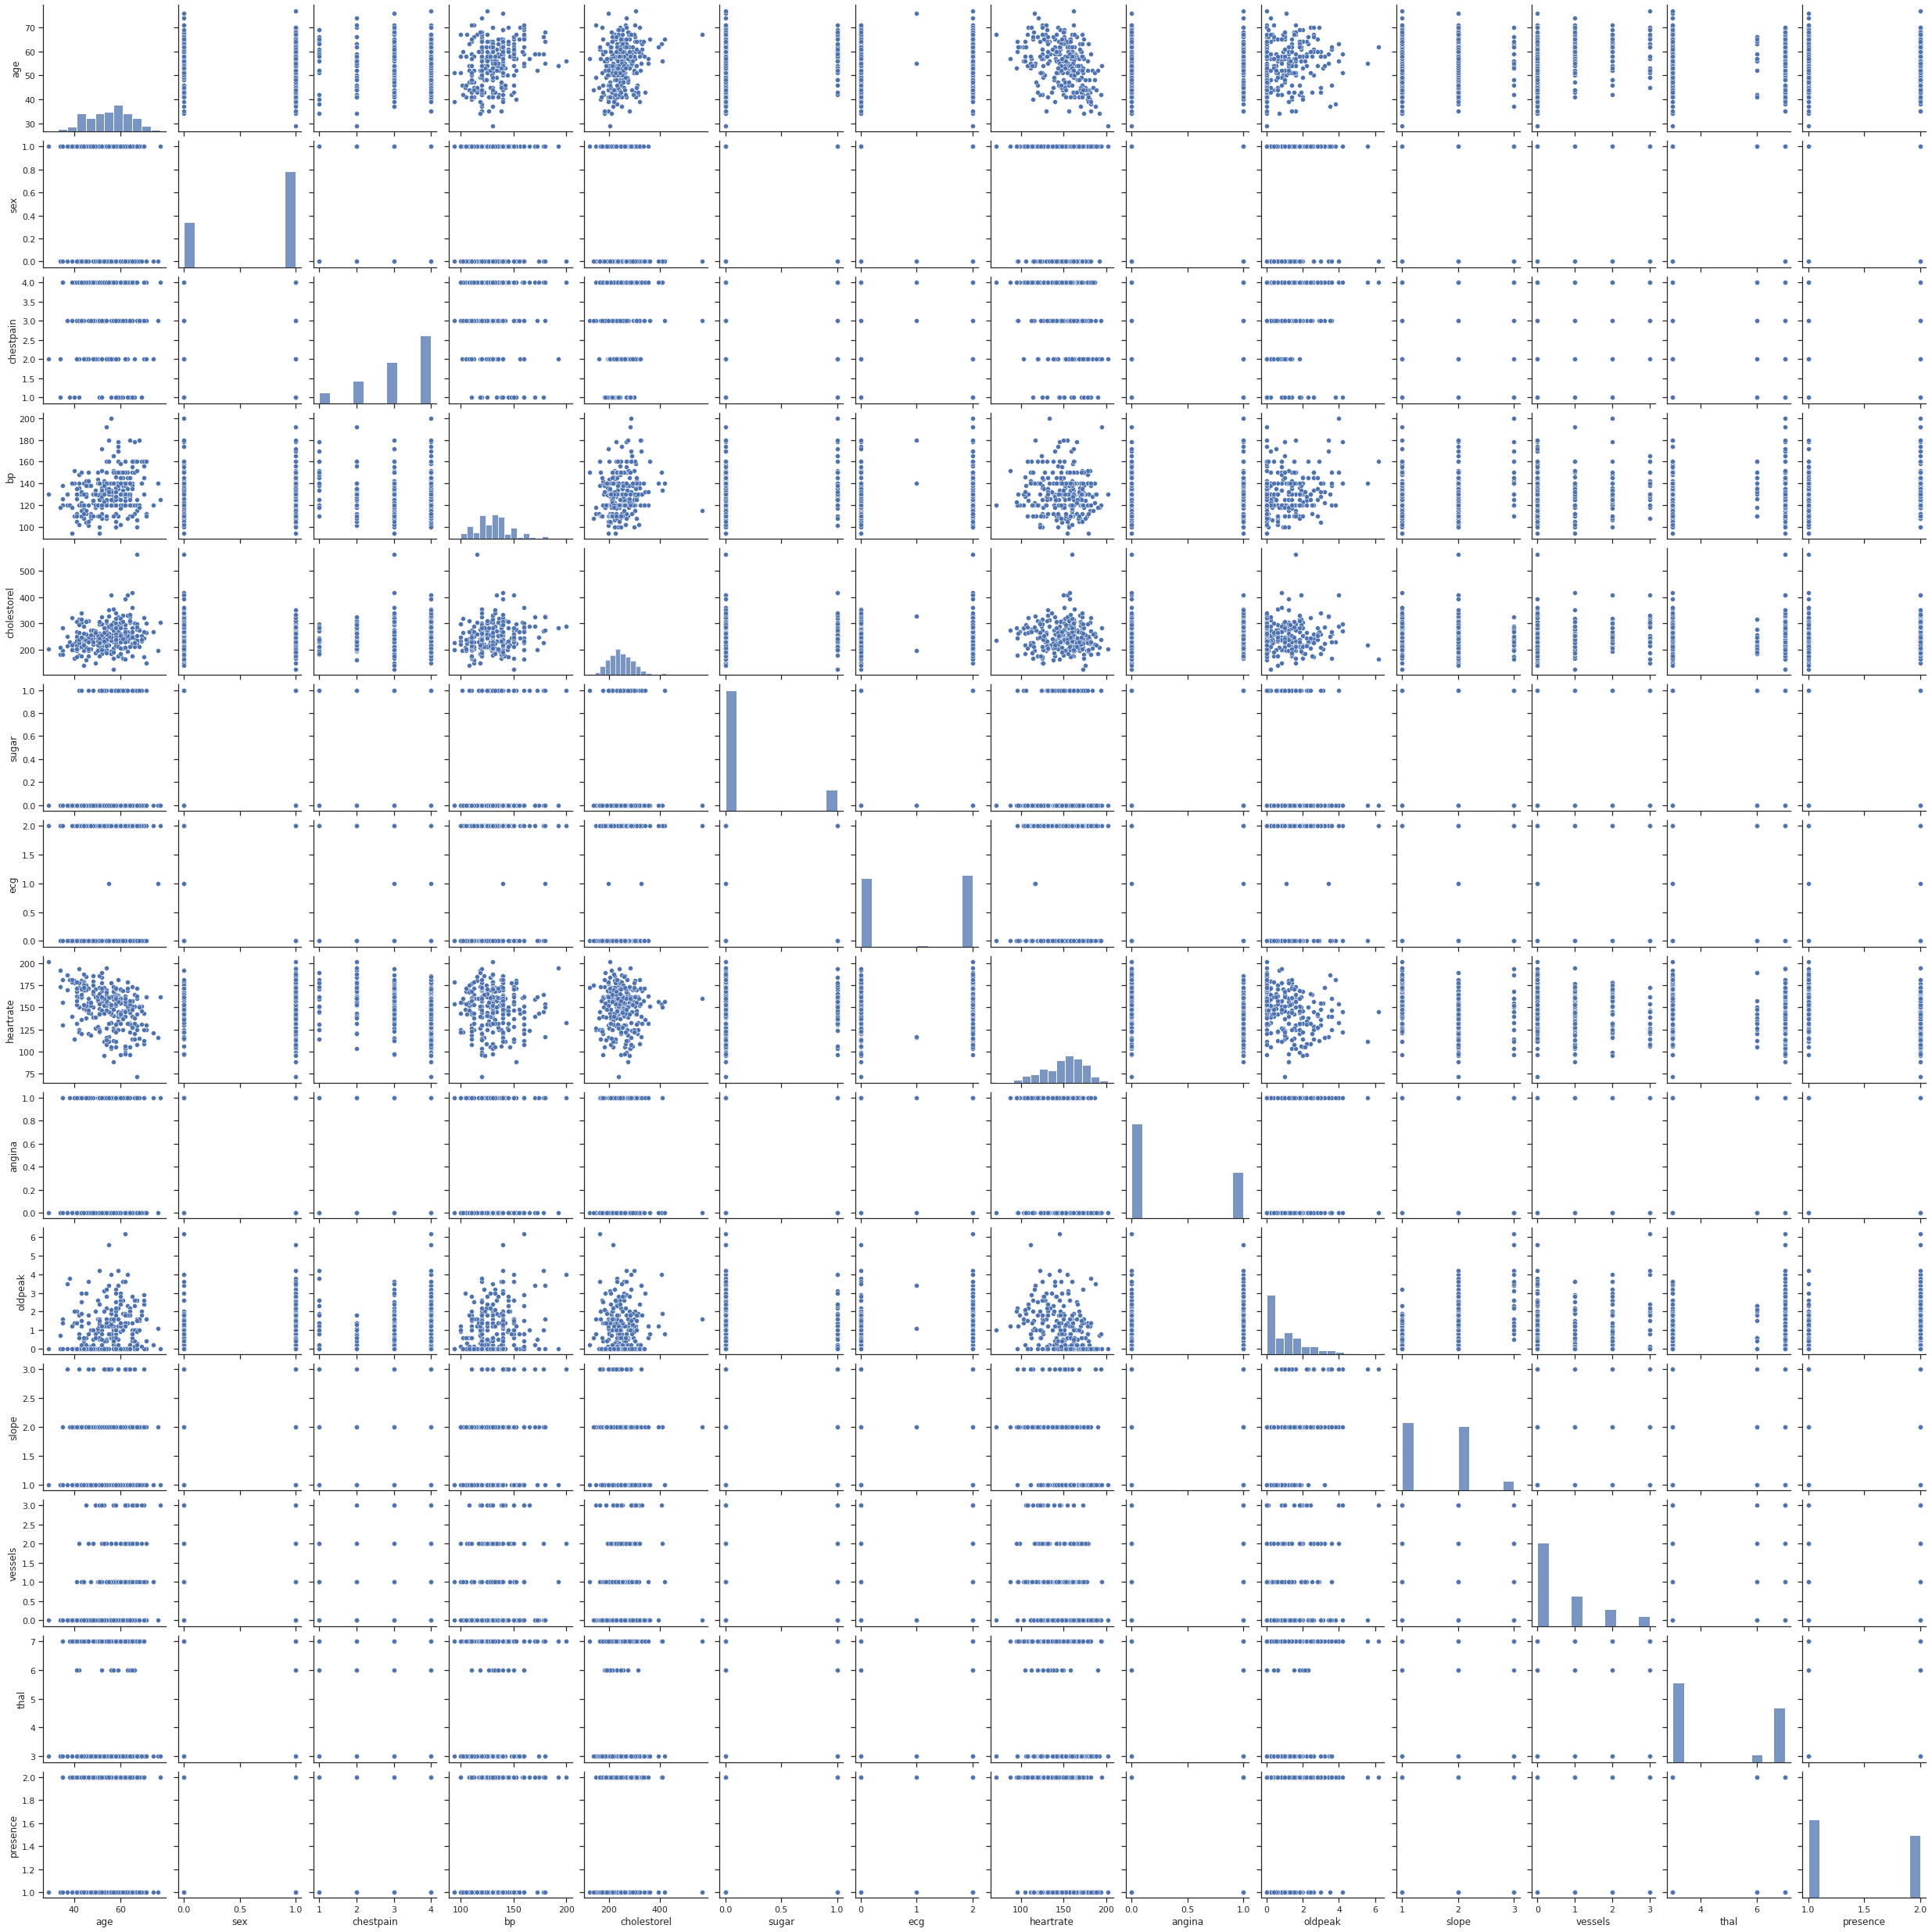

In [ ]:
# Now let us use one amazing new data visualization library called as seaborn
import seaborn as sns

# Use pairplot from sns to plot this data frame
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

import matplotlib.pyplot as plt
plt.show()

***EXERCISE 3: [5 POINTS]***



In [ ]:
# see the statistics of the data by describing dataframe
# Your code goes here
df.describe()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
# If you go through metadata (Attribute Information:)
# You will find following information

# Attributes types
# -----------------

# Real: 1,4,5,8,10,12
# Ordered:11,
# Binary: 2,6,9
# Nominal:7,3,13

# This means all data in our dataframe are not of same types
# So we should deal them accordingly
# We don't have to do anything to 'real' data
# However we have to deal with binary data and nominal data
# This dataset has already incoded binary data as presence(1) or absence(0) information, so we don't have to do anything

# We only need to convert all nominal and ordered data to dummy variables 
# The folllwing is an example presents you a way to convert these variable into real variable using dummy variable
# Then You have to convert rest of the data by your self

In [ ]:
# Lets see binary and nominal dat
# binary data = [sex, sugar, angina]
# nominal data = [chestpain, ecg, thal]
# ordered data = [slope]
# Lets view the data
df.head()

,age,sex,chestpain,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [ ]:
# Lets see the unique chestpain cases
# Code goes here
df.chestpain.unique()

array([4., 3., 2., 1.])

In [ ]:
# Lets get dummy variable for chestpain
# This is basically one hot encoding which means each row has only '1' value and rest are '0'
# Following lines of code will remove 'chestpain' column from the dataframe and replace with dummy values
# You can see these dummy values being appended columnwise
df = pd.get_dummies(df, columns=['chestpain'], prefix='chestpain', prefix_sep='-')
df.head()

,age,sex,bp,cholestorel,sugar,ecg,heartrate,angina,oldpeak,slope,vessels,thal,presence,chestpain-1.0,chestpain-2.0,chestpain-3.0,chestpain-4.0
0,70.0,1.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2,0,0,0,1
1,67.0,0.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1,0,0,1,0
2,57.0,1.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2,0,1,0,0
3,64.0,1.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1,0,0,0,1
4,74.0,0.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1,0,1,0,0


***EXERCISE 4: [5 POINTS]***



In [ ]:
# Let's convert all nominal and ordered data to dummy variables like the above example
# Hint: you can do all in one line by passing multiple value in columns and prefix

# Code goes below
df = pd.get_dummies(df, columns= ['ecg', 'thal', 'slope'], prefix= ['ecg', 'thal', 'slope'], prefix_sep= '-')
df.head()

,age,sex,bp,cholestorel,sugar,heartrate,angina,oldpeak,vessels,presence,chestpain-1.0,chestpain-2.0,chestpain-3.0,chestpain-4.0,ecg-0.0,ecg-1.0,ecg-2.0,thal-3.0,thal-6.0,thal-7.0,slope-1.0,slope-2.0,slope-3.0
0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4,3.0,2,0,0,0,1,0,0,1,1,0,0,0,1,0
1,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,0.0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
2,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,0.0,2,0,1,0,0,1,0,0,0,0,1,1,0,0
3,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,1.0,1,0,0,0,1,1,0,0,0,0,1,0,1,0
4,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1.0,1,0,1,0,0,0,0,1,1,0,0,1,0,0


In [ ]:
# Sklearn

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Get training data from dataframe
# Assign values of ['presence'] column to y, note you have to use .values method
# Drop 'presence' column from data frame,
# assign df values to x

y = df['presence'].values 
df.drop(columns=['presence'], inplace=True)
x = df.values

In [ ]:
# View shape of x and y
x.shape, y.shape

((270, 22), (270,))

In [ ]:
# Split dataset into train and test data use train_test_split
# Use stratify = y and test_size = 20 and random_state = 1

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1, stratify=y)

In [ ]:
# Initialize n_neighbors = 3
# Fit knn model with xtrain and ytrain data

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Predict xtest and view first 25 prediciton
# Compare prediction with real ytest
# Your code goes here
print(knn.predict(xtest)[0:25])
print(ytest[0:25])

[2 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1]
[2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 1]


In [ ]:
# Now get the score using score method 
print(knn.score(xtest, ytest))


0.7222222222222222


In [ ]:
# Note the way we fit the dataset is not good 
# Next we need to do some normalization work to rescale the dataset 
# First we will rescale only real value columns
realcols = ['age','bp','cholestorel','heartrate','oldpeak','vessels']

# For each column normalize df[col] as (x - mean) / standard_deviation

for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (df[col] - mean)/std

In [ ]:
# Now run your experiment again and print score

# update x
x = df.values

# Train test Split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1, stratify=y)

# Model Initialization
knn = KNeighborsClassifier(n_neighbors=3)

# Model fitting with training data
knn.fit(xtrain, ytrain)

# Now print score on test data
knn.score(xtest, ytest)

0.8703703703703703

***EXERCISE 5: [10 POINTS]***



In [ ]:
# Compare score with and without data normalization and explain

# Your answer goes here
"""
write your answer below

Normalized score: 0.8703703703703703
Without nomalization: 0.7222222222222222

Without the normalization the model became less accurate because it did not take 
into account for the standard deviation 

"""
print()

[0.7777777777777778, 0.7592592592592593, 0.8703703703703703, 0.8888888888888888, 0.9444444444444444, 0.9259259259259259, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9259259259259259, 0.9074074074074074, 0.9259259259259259, 0.9074074074074074, 0.9259259259259259, 0.9074074074074074]
BEST VALUE OF K 5


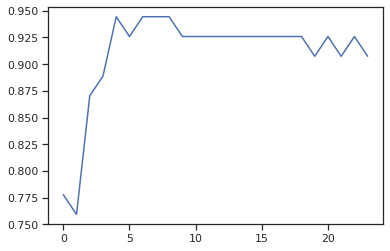

In [ ]:
# Now we will write a function that will initialize, fit and return score on test data for given values of k
# Plot your result
import matplotlib.pyplot as plt

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain, ytrain)
  return knn.score(xtest, ytest)

# Use values from 1 to 25(inclusive) and get score and plot as a bar graph
# Hint : For advance method you can use map (recall functional programming from last exercise)
# or you can use simple loops

# Your code goes here
# Get everything in a list named 'result'
# print result

result = [*map(lambda i:returnScore(i,xtrain, xtest, ytrain, ytest), range(1,25))]
print(result)
plt.plot(result)

# Finally you can print the best value of k by getting the index 
# Note index starts with 0 but values of k starts with 1 so actual value of k will be 1 more
# You can use np.argmax() function

print('BEST VALUE OF K',np.argmax(result) + 1 )

***EXERCISE 6: [5 POINTS]***



In [ ]:
# Now define your best model as bestknn and print score
# fill the blank code below  
bestknn = KNeighborsClassifier(n_neighbors=5)
bestknn.fit(xtrain, ytrain)
bestknn.score(xtest, ytest)

0.9444444444444444

In [ ]:
# Finally use bestknn model we defined and create confusion matrix
# print matrix
from sklearn.metrics import confusion_matrix

ypred = bestknn.predict(xtest)
matrix = confusion_matrix(ytest, ypred)
print(matrix)

[[29  1]
 [ 2 22]]


Text(0.5, 1.0, 'Confusion matrix')

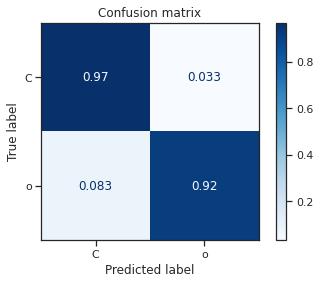

In [ ]:
# Please review following examples in documentation plot confusion plots
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(bestknn, xtest, ytest, display_labels='Confusion Matrix',cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title('Confusion matrix')

### 2. REGRESSION TASK USING SKLEARN

In [ ]:
# Lets see what we have in our directory
%ls


auto-mpg.data   heart.dat    heart.doc    sample_data/
auto-mpg.names  heart.dat.1  heart.doc.1


***EXERCISE 7: [5 POINTS]***


In [ ]:
# Lets get data from 
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

# Your code goes here
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2021-02-10 05:14:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.1’

auto-mpg.data.1     100%[===================>]  29.58K  --.-KB/s    in 0.03s   

2021-02-10 05:14:30 (991 KB/s) - ‘auto-mpg.data.1’ saved [30286/30286]



In [ ]:
# Lets get meta data from 
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

--2021-02-10 05:14:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1660 (1.6K) [application/x-httpd-php]
Saving to: ‘auto-mpg.names.1’

auto-mpg.names.1    100%[===================>]   1.62K  --.-KB/s    in 0s      

2021-02-10 05:14:31 (56.0 MB/s) - ‘auto-mpg.names.1’ saved [1660/1660]



In [ ]:
# Lets see our folder again
%ls

auto-mpg.data    auto-mpg.names    heart.dat    heart.doc    sample_data/
auto-mpg.data.1  auto-mpg.names.1  heart.dat.1  heart.doc.1


In [ ]:
# Lets take a look at metadata, auto-mpg.names

# Your code goes here

%cat auto-mpg.names

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

In [ ]:
# Read data using panda
# data = pd.read_csv(, sep='')
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','name']
df = pd.read_csv('auto-mpg.data', names=column_names, na_values = "?", comment='\t',sep=" ", skipinitialspace=True)

In [ ]:
# View head of the data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


***EXERCISE 8: [5 POINTS]***



In [ ]:
# Remove column 'name'
# Print head
df.drop(columns=['name'],inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


***EXERCISE 9: [5 POINTS]***



In [ ]:
# Check if there is na
df.isna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


***EXERCISE 10: [5 POINTS]***



In [ ]:
# Drop na and show head
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


***EXERCISE 11: [5 POINTS]***





In [ ]:
# Convert following columns to dummy variable
cols = ['cylinders','year','origin']
df = pd.get_dummies(df, columns=['cylinders', 'year', 'origin'], prefix=['cylinders', 'year', 'origin'], prefix_sep='-')
df.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders-3,cylinders-4,cylinders-5,cylinders-6,cylinders-8,year-70,year-71,year-72,year-73,year-74,year-75,year-76,year-77,year-78,year-79,year-80,year-81,year-82,origin-1,origin-2,origin-3
0,18.0,307.0,130.0,3504.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15.0,350.0,165.0,3693.0,11.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18.0,318.0,150.0,3436.0,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16.0,304.0,150.0,3433.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.0,302.0,140.0,3449.0,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


***EXERCISE 12: [10 POINTS]***



In [ ]:
# Now do data normalization on real value/continous columns
realcols = ["mpg","displacement","horsepower","weight","acceleration"]
for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = (df[col] - mean)/std

In [ ]:
# Now we are going to do some regression task.
# In this section we will try to predict real value 
# Given all the information we will try to predict mpg - miles per gallon 

***EXERCISE 13: [10 POINTS]***



In [ ]:
# Assign mpg column value to y and rest columns to x, remember x shouldn't have mpg
# Your code goes here
y = df.mpg.values
df.drop(columns=['mpg'],inplace=True)
x = df.values

In [ ]:
# Do Train test in a similar way as we did before do not use stratify=y
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1)

In [ ]:
# View the shape of your data set
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((313, 25), (79, 25), (313,), (79,))

In [ ]:
# Follow examples from references given in the top of this notebook
# Use linear model to fit regression line and plot
# Our linear model will be of following type
# Y = b + coef0*x0 + coef1*x1+coef2*x2+............
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Now view the coefficient use .coef_ and shape of .coef_ [not it is not a function, but a variable]
print(reg.coef_)
print(reg.intercept_)
print(reg.coef_.shape[0])

[ 0.1192505  -0.15224619 -0.61496586  0.02092634 -0.6358025   0.21115814
  0.2048133  -0.08713151  0.30696257 -0.38465186 -0.23786181 -0.47386072
 -0.44623061 -0.17606361 -0.2546858  -0.18816691 -0.02347771  0.02785325
  0.23596676  0.81711485  0.48029694  0.62376723 -0.17226673  0.06651513
  0.1057516 ]
-0.09296052185299347
25


***EXERCISE 14: [10 POINTS]***



In [ ]:
# Now if you view 
print(f'{reg.coef_.shape[0]},{xtrain.shape[1]}, ', f'are equal? {reg.coef_.shape[0]==xtrain.shape[1]}')

# Why they are same?
# Answer goes here
"""
write your answer below

They're the same because the dummy arguments are assigned values when fitting 
with xtrain/ytrain


"""
print()

25,25,  are equal? True



In [ ]:
# Now lets see what score is here
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(xtest,ytest)

reg.score(xtest,ytest)

0.8916534041339546

In [ ]:
# Calculate the score on train and test sets
# Your code goes below
reg.score(xtrain,ytrain), reg.score(xtest,ytest)

(0.8200472957796959, 0.8916534041339546)

***EXERCISE 15: [10 POINTS]***



In [ ]:
# Explain what's the meaning of reg.score return value. 
# Note: you can use function helper 'reg.score?' to help you get the answer 
"""
Your answer goes here: 
The score predicts the accuracy of the model based on the data that 
was fed to it through train and is compared to the test values


"""

'\nYour answer goes here: \nThe score predicts the accuracy of the model based on the data that \nwas fed to it through train and is compared to the test values\n\n\n'

In [ ]:
# Now Write a custom function to calculate r2 score

def r2score(ytrue, ypred):
  rss = ((ytrue - ypred)**2).sum()
  tss = ((ytrue - ytrue.mean()) ** 2).sum()
  r2 = 1 - rss/tss
  return r2

# Now do prediction on xtrain and xtest and check your r2 score by printing rescore values 
# Code goes here
trainpredict = reg.predict(xtrain)
testpredict = reg.predict(xtest)

print(r2score(ytrain, trainpredict), r2score(ytest, testpredict))

# You can see that reg.score values and your custom function output are matched

0.8200472957796959 0.8916534041339546


In [ ]:
# Now we will try to reveal the secret of linear regression.
# One way of achieving linear regression is by minimizing the error between actual y and predicted y.
# It is called as least square method.
# For detail information you can visit to the link provided at the bieginning of this document.
# This section is a little bit difficult, please read examples and documentation carefully. 
# We will make our custom least square optimize to calculate model parameters that minimizes output error. 

In [ ]:
import scipy.optimize as optimization

# Write a function which takes weights(or params), x and y and do following
#      - calculate dot product between x and params , which is ypredicted
#      - calculate difference between actual y and ypredicted
#      - return the difference

# complete following function
def constraint(params, x, y):
  ypred = x@params
  return y-ypred

# We need initial guess for our params
# Our initial params is a vector of size equal to dimension of x, or you can say number of columns of x
# You can create zeros vector using np.zeros(size)

# complete code
params = np.zeros(x.shape[1])


# Now study the documentation and complete following code
params, _ = optimization.leastsq(constraint, params, args=(xtrain, ytrain))

# Now we have parameter or weight we can now create our model
model = lambda x:np.dot(x,params)

# Now predict xtrain using model and see first 5 predicted and actual values
ypred_train = model(xtrain)
print(ypred_train[:5])
print(ytrain[:5])

# Similarly calculate prediction on test set and view frist 5 predicted values
ypred_test = model(xtest)
print(ypred_test[:5])
print(ytest[:5])

# Now use custom made r2score calculator to calculate r2 score on both train and test set
print(r2score(ytest, ypred_test), r2score(ytrain, ypred_train))

# Compare these results with the results you got from library based implementation

[ 0.79370023 -0.75267238  0.54018392  1.77416136  1.24366989]
[ 0.48098373 -0.62087299  0.71160491  1.76221248  1.22409641]
[ 0.02836142  0.56226081  1.18625139 -0.29593787  1.59445988]
[-0.05713234  0.71160491  1.14722268 -0.56962384  1.86471078]
0.8574958413643603 0.8772133020796734
